# Students drop-out

In [1]:
import warnings
warnings.filterwarnings('ignore')
from ipynb.fs.full._init_ import *
os.getcwd()

/Users/diegoolaya/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/diegoolaya/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


'/Users/diegoolaya/OneDrive - Vrije Universiteit Brussel/Chile/Student Attrition/Students_Python'

### Load the data

In [2]:
df_path = 'final_data_set.csv'
docu_path = 'Documentation_V1.csv'
# Firts submission(Documentation)
    #name_target = "V54"
    #treatment = "all"
    #col_treatment = "treatment"
    #df_list = pre_process(df_path,docu_path,name_target,treatment)
    #df = df_list[0]
    #list_predictors = df_list[1]
# Second submission 
data_object = preprocess_with_woe(df_path,docu_path,"V5","treatment")
df = data_object['df']
col_target = data_object['target']
col_treatment = data_object['treatment']
predictors = data_object['predictors']

In [ ]:
#df.to_csv(r'/Users/diegoolaya/OneDrive - Vrije Universiteit Brussel/Research/R Files/Other/df_dropstudents_v1.csv')
#predictors = pd.DataFrame(predictors)
#predictors.to_csv(r'/Users/diegoolaya/OneDrive - Vrije Universiteit Brussel/Research/R Files/Other/predictors_dropstudents_v1.csv')

### Non-zero predictors

In [ ]:
#list_predictors = near_zero_variance(data['df'],data['predictors'])

### Recursive feature elimination with CV loop

In [ ]:
#estimator = RandomForestClassifier(n_estimators = 20,random_state=1)
#selector = RFECV(estimator, step = 1, cv = 10)
#selector = selector.fit(data['df'][data['predictors']],data['df'][data['target']])
#list_predictors = list(data['df'].iloc[:,list(np.where(selector.support_ == True)[0])].columns)
#filename = "list_pred_students.sav"
#list_predictors = joblib.load(filename)
#np.savetxt("predictors_students.csv", list_predictors, delimiter=",", fmt='%s')

## Predictive modeling

### Cross-validation

In [ ]:
#crossvalidated = crossvalidation(df,list_predictors,name_target)

### Over-sampling using SMOTE

In [ ]:
#dfs_train_smote = imba_cor(crossvalidated[0],list_predictors,name_target)

### Modeling

In [ ]:
#amount_folds = 5
#fitted_models = []
#pred_prob = []
#for i in list(range(amount_folds)):
    #fitted_models.append(predictive_model(dfs_train_smote[i],list_predictors,name_target,"rf"))
    #pred_prob.append(predicted_prob(fitted_models[i],crossvalidated[1][i],list_predictors,name_target))

In [ ]:
#top_predictors = 7
#analyse_predictors = []
#feature_importances = []
#for i in list(range(amount_folds)):
    #feature_importances.append(pd.DataFrame(fitted_models[i].feature_importances_,index = dfs_train_smote[i][list_predictors].columns,columns=['importance']).sort_values('importance',ascending=False))
    #analyse_predictors.append(list(feature_importances[i][:top_predictors].index))
#final_list = list(set(analyse_predictors[0]) | set(analyse_predictors[1]) | set(analyse_predictors[2]) | set(analyse_predictors[3]) | set(analyse_predictors[4]))
#len(final_list)

### ROC & AUC

In [ ]:
#plot_roc(pred_prob)

## Uplift modeling

### Plot of treatments

In [ ]:
#plot_treatments(df_path,docu_path)

In [ ]:
#plot_obs_u(df,col_treatment,name_target,"V2",2)

In [ ]:
#pd.crosstab(index = df[name_target], columns = df[col_treatment], margins = True)

In [ ]:
df_pre_analysis = data(df[col_target],df[col_treatment],df[predictors])
print(Summary(df_pre_analysis,predictors,2))

### PS Matching

#### FIRST SUBMISSION

In [ ]:
#matches = matching(df,list_predictors,col_treatment,4,True)
#df_matched = matches[2]
#df_matched = pd.read_csv("df_matched.csv", sep = ',')
#list_predictors = [x.strip(' ') for x in list_predictors]
#list_predictors.remove('V4_CU')
#list_predictors.remove('V4_PS')
#list_predictors = near_zero_variance(df_matched,list_predictors)
#df_matched = df_matched.reset_index(drop=True)
#df_post_matched = data(df_matched[name_target],df_matched[col_treatment],df_matched[list_predictors])
#df = df_matched
#df_predictors.columns = df_predictors.columns.str.replace(' ','')
#df[["V9","V10","V55"]]
#df = df_matched

#### SECOND SUBMISSION

In [3]:
df_matched = pd.read_csv("df_dropstudents_matched_V1.csv", sep = ',')
df = df_matched

In [ ]:
pos_matching = data(df[col_target],df[col_treatment],df[predictors])
print(Summary(pos_matching,predictors,2))

### Stratified CV keeping proportions of treated and non-treated

In [4]:
amountofFolds = 10
random.seed(100)
folds = stratifiedCV(df,amountofFolds,col_treatment,col_target)
get = []
for i in list(range(0,amountofFolds)):
    a = np.arange(len(folds))
    get.append(a[np.arange(len(a))!= i])  
trainIndexes = []
testIndexes = []
random.seed(100)
for i in list(range(0,amountofFolds)):
    trainIndexes.append(list(chain.from_iterable([folds[i] for i in get[i]])))
    testIndexes.append(folds[i])

### Modeling

#### Own implementations

In [ ]:
list_m_names = ["SMARF","SMAxgboost","MOAxgboost","MOARF","MCAxgboost","MCARF"]

def training_um(model_name):
    summary_model = []
    dataTrain = []
    dataValidation = []
    for i in list(range(0,amountofFolds)):
        random.seed(100)
        dataTrain.append(pd.concat([df.loc[trainIndexes[i],predictors],df.loc[trainIndexes[i],col_treatment],df.loc[trainIndexes[i],col_target]],axis = 1))
        dataValidation.append(pd.concat([df.loc[testIndexes[i],predictors],df.loc[testIndexes[i],col_treatment],df.loc[testIndexes[i],col_target]], axis = 1))
        summary_model.append(uplift_model(dataTrain[i],dataValidation[i],col_treatment,predictors,col_target, 2,model_name))
    return summary_model;

um_results = []
for model in list_m_names:
    um_results.append(training_um(model))

In [ ]:
#joblib.dump(um_results,'um_results_V11.sav')

In [ ]:
#dataTrain[9].to_csv(r'/Users/diegoolaya/OneDrive - Vrije Universiteit Brussel/Research/R Files/Other/trainF10_students.csv')
#dataValidation[9].to_csv(r'/Users/diegoolaya/OneDrive - Vrije Universiteit Brussel/Research/R Files/Other/testF10_students.csv')

#### Python built-in implementations

In [ ]:
list_m_py = ['XLearner', 'RLearner', 'KL', 'ED', 'Chi', 'CTS']

def training_umPy(model_name):
    dataTrain = []
    dataValidation = []
    summary_model = []
    uplift_model = []
    y_pred = []
    result = []
    for i in list(range(0,amountofFolds)):
        dataTrain.append(pd.concat([df.loc[trainIndexes[i],predictors],df.loc[trainIndexes[i],col_treatment],df.loc[trainIndexes[i],col_target]],axis = 1))
        dataValidation.append(pd.concat([df.loc[testIndexes[i],predictors],df.loc[testIndexes[i],col_treatment],df.loc[testIndexes[i],col_target]], axis = 1))
        dataTrain[i][col_treatment] = np.where(dataTrain[i][col_treatment] == 0, "control","treatment")
        dataValidation[i][col_treatment] = np.where(dataValidation[i][col_treatment] == 0, "control","treatment")    
        dataTrain[i][col_target] = np.where(dataTrain[i][col_target] == 0, 1,0)
        dataValidation[i][col_target] = np.where(dataValidation[i][col_target] == 0, 1,0)       
        uplift_model.append(UpliftRandomForestClassifier(n_estimators = 100,evaluationFunction = model_name,random_state = 100,control_name="control",max_features = int(round(np.sqrt(len(predictors))))))
        uplift_model[i].fit(dataTrain[i][predictors].values,treatment = dataTrain[i][col_treatment].values,y = dataTrain[i][col_target].values)
        y_pred.append(uplift_model[i].predict(dataValidation[i][predictors].values))
        result.append(pd.DataFrame(y_pred[i],columns=uplift_model[i].classes_))
        dataValidation[i].reset_index(drop = True, inplace= True)
        result[i].reset_index(drop = True, inplace= True)
        result[i] = result[i].rename(columns={'treatment' : "s"})
        dataValidation[i][col_treatment] = np.where(dataValidation[i][col_treatment] == "control", 0,1)
        dataValidation[i][col_target] = np.where(dataValidation[i][col_target] == 1, 0,1)
        summary_model.append(pd.concat([dataValidation[i],result[i]],axis =1))
    return summary_model;

um_resultsPy = []
for model in list_m_py:
    um_resultsPy.append(training_umPy(model))

In [ ]:
#joblib.dump(um_resultsPy,'um_resultsPy_V11.sav')

#### Join the results of all models

In [5]:
list_m_names = ["SMARF","SMAxgboost","MOAxgboost","MOARF","MCARF","MCAAxgboost"]
list_m_py = ['XLearner', 'RLearner', 'KL', 'ED', 'Chi', 'CTS']
um_results = joblib.load("um_results_V11.sav")
um_resultsPy = joblib.load("um_resultsPy_V11.sav")
um_results.extend(um_resultsPy)
list_m_names.extend(list_m_py)

### Performance

In [ ]:
amountofFolds = 10
def um_perf(continues,amountofFolds,um_results,list_m_names):
    if continues == True:
        performance = []
        for i in list(range(0,amountofFolds)):
            performance.append(performance_uplift(um_results[i],col_treatment,col_target,True,2,list_m_names))
    elif continues == False:
        performance = []
        for i in list(range(0,amountofFolds)):
            performance.append(performance_uplift(um_results[i],col_treatment,col_target,False,2,list_m_names))
    return performance;

# Performance (gains and df_predictions)

perf_results = []
for i in list(range(len(um_results))):
    perf_results.append(um_perf(False,amountofFolds,um_results[i],list_m_names[i]))
    
def perf_plot(perf_results):
    get_inc = []
    for i in list(range(0,amountofFolds)):
        get_inc.append(perf_results[i][0])
    return get_inc,

# Performance: only gains 

gains_plot = []
for i in list(range(len(um_results))):
    gains_plot.append(perf_plot(perf_results[i]))

### Uplift curve

#### Single model

In [ ]:
performance_to_plot = gains_plot[2]
perf_plot = []
for i in list(range(0,amountofFolds)):
    perf_plot.append(performance_to_plot[0][i])
df_plot_uplift = pd.concat(perf_plot)
sns.set_style("white")
flatui = ["#567491", "#111112"]
ax = sns.lineplot(x='x', y= 'value', hue='variable', style = 'variable',palette=flatui,lw=1,ci = 15,data = pd.melt(df_plot_uplift, ['x']))
#plt.xlim(0,100)
#plt.ylim(0,5)
plt.xticks(np.linspace(0, 100, 11, endpoint = True))
plt.xlabel("Targeted population (%)")
plt.ylabel("Cumulated segment-wise uplift")
handles, labels = ax.get_legend_handles_labels()
leg = plt.legend(loc='lower right',handles=handles[1:],labels=labels[1:],frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(1)
#plt.title("Uplift curve")
#fig_uplift = ax.get_figure()
#fig_uplift.savefig('MOAxgboost_V1.pdf',bbox_inches='tight',transparent =True)

#### All models

In [ ]:
list_perf_models = []
for i in list(range(len(um_results))):
    list_perf_models.append(gains_plot[i][0])
list_df_models = []
for i in list_perf_models:
    list_df_models.append(pd.melt(pd.concat(i), ['x']))
df_plot_uplift = pd.concat(list_df_models)
df_plot_uplift.columns = ['x','Model',"Value"]
sns.set_style("white")
ax = sns.lineplot(x='x', y= 'Value', hue='Model',lw=1,ci = 10,data = df_plot_uplift)
plt.xlabel("Targeted population (%)")
plt.ylabel("Uplift (%)")
plt.title("Uplift curve")
plt.xlim(0,100)
plt.xticks(np.linspace(0, 100, 11, endpoint = True))
#ax.legend(loc = 4, frameon = False, ncol = 1, labelspacing= 0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#fig_uplift = ax.get_figure()
#fig_uplift.savefig('Uplift_decile.pdf',bbox_inches='tight',transparent =True)

### Qini metric

#### At certain percentage

In [ ]:
number_model = 11
perf_list_model = gains_plot[number_model][0]
model_name = list_m_names[number_model]
print(list_m_names[number_model])

def ave_qini_at_decile(perf_list_model,model_name,amountofFolds,percentage):
    
    #perf_list_model[5] = perf_list_model[5].fillna(0)
        
    qini_at_decile = []
    for i in list(range(0,amountofFolds)):
        qini_at_decile.append(qini_spe(perf_list_model[i],percentage,model_name))
    
    def Average(lst):
        return sum(lst) / len(lst)     
    qini_at_decile_mean = Average(qini_at_decile)
    qini_at_decile_sd = np.std(qini_at_decile)
    return [qini_at_decile_mean,qini_at_decile_sd];

list_per = [10,30,50,100]

for percentage in list_per:
    print(ave_qini_at_decile(perf_list_model,model_name,amountofFolds,percentage))

In [ ]:
#s = np.isnan(gains_plot[3][0][2])
#gains_plot[3][0][2][s]=0.0

#### At all percentages

In [ ]:
out_qini = []
for i in list(np.linspace(0, 100, 11, endpoint = True)):
    out_qini.append(ave_qini_at_decile(perf_list_model,model_name,amountofFolds,i))
out_qini

#### Plot qini variation 

In [ ]:
def get_qini_plot(perf_list_model,model_name):
    qinis_to_plot = qini_lists_fold(perf_list_model,model_name,amountofFolds)
    return qinis_to_plot;

list_qini_plot = []
for i in list(range(len(um_results))):
    list_qini_plot.append(get_qini_plot(gains_plot[i][0],list_m_names[i]))

In [ ]:
list_df_models = []
for i in list_qini_plot:
    list_df_models.append(pd.melt(pd.concat(i), ['x']))
df_plot_uplift = pd.concat(list_df_models)
df_plot_uplift.columns = ['x','Model',"Value"]
sns.set_style("white")
ax = sns.lineplot(x='x', y= 'Value', hue='Model',lw=0.9,ci = 10,data = df_plot_uplift)
plt.xlabel("Targeted population (%)")
plt.ylabel("Qini")
#plt.title("Qini variation")
plt.xlim(0,100)
plt.xticks(np.linspace(0, 100, 11, endpoint = True))
#ax.legend(loc = 4, frameon = False, ncol = 1, labelspacing= 0.2)
plt.legend(bbox_to_anchor=(1.05, 0.97), loc=2, borderaxespad=0.)
#fig_uplift = ax.get_figure()
#fig_uplift.savefig('Qini_decile.pdf',bbox_inches='tight',transparent =True)

### Profiling

#### Feature importance (xgboost)

In [ ]:
def training_um(model_name):
    summary_model = []
    dataTrain = []
    dataValidation = []
    for i in list(range(0,amountofFolds)):
        random.seed(100)
        dataTrain.append(pd.concat([df.loc[trainIndexes[i],predictors],df.loc[trainIndexes[i],col_treatment],df.loc[trainIndexes[i],col_target]],axis = 1))
        dataValidation.append(pd.concat([df.loc[testIndexes[i],predictors],df.loc[testIndexes[i],col_treatment],df.loc[testIndexes[i],col_target]], axis = 1))
        summary_model.append(uplift_model(dataTrain[i],dataValidation[i],col_treatment,predictors,col_target, 2,model_name))
    return summary_model;

list_prof = ["MOAxgboost"]
um_prof_res = []
for model in list_prof:
    um_prof_res.append(training_um(model))

In [ ]:
imp_df = []
for i in list(range(0,amountofFolds)):
    imp_df.append(um_prof_res[0][i]['importance'])
    
importance_folds = pd.concat(imp_df, axis = 1)
importance_folds.columns = ["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10"]
importance_folds["average"] = importance_folds.mean(axis=1)
importance_folds = importance_folds.sort_values('average',ascending =False)
Top = 10
importance_folds.iloc[0:Top,:]
final_list = list(importance_folds.iloc[0:Top,:].index)
print(len(final_list))
#importance_folds.to_csv(r'feature_importance_v1.csv')

#### Plot feature importance (point plot)

In [ ]:
def uplift_bin(predictions,treatment,target,direction,model_name,num_bins):
    pred_sorted = predictions.sort_values(by = ["s"], ascending = False)
    pred_sorted["ranking"] =  list(range(1,len(pred_sorted)+1))
    labels = list(range(1,num_bins+1))
    pred_sorted["bin"] = pd.cut(pred_sorted['ranking'], num_bins, labels = labels)
    pred_sorted["ct"] = np.where(pred_sorted[treatment]==0,1,0)
    pred_sorted["r_t"] = np.where((pred_sorted[treatment]==1) & (pred_sorted[target]==1),1,0)
    pred_sorted["r_c"] = np.where((pred_sorted[treatment]==0) & (pred_sorted[target]==1),1,0)
    n_c = pred_sorted.pivot_table(index='bin', values= "ct", aggfunc='sum')
    n_t = pred_sorted.pivot_table(index='bin', values= treatment, aggfunc='sum')
    n_y1_c = pred_sorted.pivot_table(index='bin', values= "r_c", aggfunc='sum')
    n_y1_t = pred_sorted.pivot_table(index='bin', values= "r_t", aggfunc='sum')
    perf_table = pd.concat([n_c,n_t,n_y1_c,n_y1_t], axis = 1)
    perf_table.columns = ["n_c","n_t","n_y1_c","n_y1_t"]
    perf_table["r_y1_c"] = perf_table["n_y1_c"]/perf_table["n_c"]
    perf_table["r_y1_t"] = perf_table["n_y1_t"]/perf_table["n_t"]
    if direction == 1:
        perf_table["uplift"] = perf_table["r_y1_t"] - perf_table["r_y1_c"]
    elif direction == 2:
        perf_table["uplift"] = perf_table["r_y1_c"] - perf_table["r_y1_t"]
    return pred_sorted;

perf_results = []
amountofFolds = 10
for i in list(range(0,amountofFolds)):
    perf_results.append(uplift_bin(um_results[2][i],col_treatment,col_target,2,list_m_names[2],4))

In [ ]:
#final_list = ["V40","V3_IC","V49","V48","V3_II","V51","V6"]#,,"V6","V36_PaO","V41"
perf_type = perf_results
prof_folds = []
for i in list(range(len(perf_type))):
    prof_folds.append(perf_type[i].pivot_table(index='bin', values= final_list, aggfunc='mean'))
ave_predictors_fold = pd.concat(prof_folds, axis = 1)
ave_predictors_fold.index = list(range(1,len(ave_predictors_fold)+1))
ave_predictors_fold["x"] = ave_predictors_fold.index
ave_predictors_fold
ave_predictors_fold["x"] = ave_predictors_fold["x"].astype(object)
ave_predictors_fold = pd.melt(ave_predictors_fold, ['x'])

#ave_predictors_fold["variable"] = ave_predictors_fold["variable"].replace({
    #"V40":"Perf_1sem",
    #"V3_IC": "BP1",
    #"V49":"Econ_1sem",
    #"V48":"Math_1sem",
    #"V3_II":"BP2",
    #"V51": "Engl_1sem",
    #"V6" :"EntryScore"})

#ave_predictors_fold["variable"] = ave_predictors_fold["variable"].replace({
    #"V40":"Perf_1sem",
    #"V3_IC": "BP1",
    #"V49":"Econ_1sem",
    #"V48":"Math_1sem",
    #"V3_II":"BP2",
    #"V51": "Engl_1sem",
    #"V50": "Stat_1sem",
    #"V6" :"EntryScore",
    #"V36_PaO":"NoGrant",
    #"V41":"NumCour_1sem"})

sns.set_style("white")
ax_prof = sns.pointplot(x='x', y= 'value', hue='variable',scale = 0.3, ci = None,data = ave_predictors_fold)
plt.xlabel("Quartile")
plt.ylabel("Average")
#plt.title("Profiling by decile")
#plt.xlim(1,10)
plt.legend(bbox_to_anchor=(1.05, 0.87), loc=2, borderaxespad=0.)
#fig_uplift = ax_prof.get_figure()
#fig_uplift.savefig('Uplift_decile_profiling.pdf',bbox_inches='tight',transparent =True)

In [ ]:
# Predictors variance accross folds
#list_std_predictors = []
#for predictor in predictors:
    #list_std_predictors.append(ave_predictors_fold[ave_predictors_fold['variable'] == predictor]['value'].std())
#df_stds = {'variable':predictors,'sd':list_std_predictors}
#df_stds = pd.DataFrame(df_stds)
#df_stds = df_stds.sort_values('sd',ascending =False)
#list(df_stds.iloc[:10,0])

In [ ]:
#pd.read_csv("final_data_set.csv", sep = ',')['DEPENDENCIA'].value_counts()

#### Radar chart 

In [ ]:
def average_var_folds(prof_folds,group):
    fold_variables = []
    for i in list(range(len(perf_results))):
        fold_variables.append(prof_folds[i].iloc[group,:])
    return pd.concat(fold_variables,axis=1).mean(axis=1);

var_ave_fold = []
num_bins = 4
for i in list(range(num_bins)):
    var_ave_fold.append(average_var_folds(prof_folds,i))
var_ave_fold = pd.concat(var_ave_fold, axis =1)

var_ave_fold.rename(index = {
    "V48":"PSU score mathematics",
    "V75": "Type of entrance",
    "V76":"Type of student (Bachelor A, B or C)",
    "V46" :"Score entrance exam",
    "V14": "Number of courses 1st semester",
    "V15": "Private school",
    "V55":"Performance 1st semester",
    "V65": "Performance in English 1st semester",
    "V67": "Number of  family members in primary school",
    "V70": "Number of family members"}, inplace = True)

var_ave_fold.columns = ["Bin 1","Bin 2", "Bin 3", "Bin 4"]#"Bin 5", "Bin 6", "Bin 7", "Bin 8", "Bin 9", "Bin 10"

from math import pi

categories=list(var_ave_fold.index)
N = len(categories)
values = list(var_ave_fold.iloc[:,0])
values += values[:1]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(1,1,1, projection='polar') 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, color='black', size=9, zorder = 200)
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')
#ax.set_rlabel_position(0)
plt.yticks(np.arange(round(min(values),1), max(values)+0.1, step=0.1), color="black", size=7)
ax.set_rlabel_position(180 / N)
#plt.ylim(0,40)
#ax.grid(True)
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)

In [ ]:
var_ave_fold["Bin 1"]

In [ ]:
var_ave_fold['group'] = list(var_ave_fold.index)
categories = list(var_ave_fold.index)
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, color='black', size=12)
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')
my_palette = plt.cm.get_cmap("tab10", len(final_list))

# Bin 1
values= var_ave_fold["Bin 1"].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values,color=my_palette(0), linewidth=1.5, linestyle='solid', label="Quartile 1")
ax.fill(angles, values, 'b', alpha=0.05)
# Bin 2
values= var_ave_fold["Bin 2"].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5,color=my_palette(1), linestyle='solid', label="Quartile 2")
ax.fill(angles, values, 'r', alpha=0.05)
# Bin 3
values= var_ave_fold["Bin 3"].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values,color=my_palette(2), linewidth=1.5, linestyle='solid', label="Quartile 3")
ax.fill(angles, values, 'r', alpha=0.05)
# Bin 4
values= var_ave_fold["Bin 4"].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5,color=my_palette(3), linestyle='solid', label="Quartile 4")
ax.fill(angles, values, 'r', alpha=0.05)

plt.yticks(np.arange(round(min(values),1), max(values)+0.1, step=0.2), color="black", size=7)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=4, fancybox=True, shadow=True)
my_dpi= 100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
ax.get_figure().savefig('Fig4.pdf',bbox_inches='tight',transparent =True)

In [ ]:
def make_spider(column,title,color):
    categories=list(var_ave_fold.index)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(111, polar=True) 
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color='black', size=12)
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')
    ax.set_rlabel_position(180 / N)
    values = list(var_ave_fold.loc[:,column])
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.1)
    plt.yticks(np.arange(round(min(values),1), max(values)+0.1, step=0.1), color="black", size=7)
    #plt.title(title, size=11, color=color, y=1.1)
    my_dpi=96
    plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
    return ax;
    
my_palette = plt.cm.get_cmap("tab10", len(final_list))

for i,column in enumerate(list(var_ave_fold.columns)):
    make_spider(column = column, title = list(var_ave_fold.columns)[i], color=my_palette(i))

In [ ]:

make_spider(column = "Bin 4", title = list(var_ave_fold.columns)[3], color=my_palette(3)).get_figure().savefig('profile_B4.pdf',bbox_inches='tight',transparent =True)


In [ ]:
var_ave_fold

### Uplift by bin (plot)

In [6]:
# Submission 1: um_results[9][0]
predictions = um_results[2][0]
pred_sorted = predictions.sort_values(by = ["s"], ascending = False)
pred_sorted["ranking"] =  list(range(1,len(pred_sorted)+1))
labels = [1,2,3,4,5]
pred_sorted["bin"] = pd.cut(pred_sorted['ranking'], 5, labels = labels)

MOAxgboost


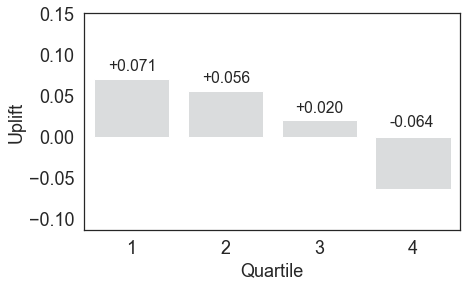

In [30]:
def uplift_bin(predictions,treatment,target,continuous,direction,model_name,num_bins):
    pred_sorted = predictions.sort_values(by = ["s"], ascending = False)
    pred_sorted["ranking"] =  list(range(1,len(pred_sorted)+1))
    labels = list(range(1,num_bins+1))
    pred_sorted["bin"] = pd.cut(pred_sorted['ranking'], num_bins, labels = labels)
    pred_sorted["ct"] = np.where(pred_sorted[treatment]==0,1,0)
    pred_sorted["r_t"] = np.where((pred_sorted[treatment]==1) & (pred_sorted[target]==1),1,0)
    pred_sorted["r_c"] = np.where((pred_sorted[treatment]==0) & (pred_sorted[target]==1),1,0)
    n_c = pred_sorted.pivot_table(index='bin', values= "ct", aggfunc='sum')
    n_t = pred_sorted.pivot_table(index='bin', values= treatment, aggfunc='sum')
    n_y1_c = pred_sorted.pivot_table(index='bin', values= "r_c", aggfunc='sum')
    n_y1_t = pred_sorted.pivot_table(index='bin', values= "r_t", aggfunc='sum')
    perf_table = pd.concat([n_c,n_t,n_y1_c,n_y1_t], axis = 1)
    perf_table.columns = ["n_c","n_t","n_y1_c","n_y1_t"]
    perf_table["r_y1_c"] = perf_table["n_y1_c"]/perf_table["n_c"]
    perf_table["r_y1_t"] = perf_table["n_y1_t"]/perf_table["n_t"]
    if direction == 1:
        perf_table["uplift"] = perf_table["r_y1_t"] - perf_table["r_y1_c"]
    elif direction == 2:
        perf_table["uplift"] = perf_table["r_y1_c"] - perf_table["r_y1_t"]
    return perf_table;

up_bin = []
# Submission 1: num_model = 9
num_model = 2
for i in list(range(0,amountofFolds)):
    up_bin.append(uplift_bin(um_results[num_model][i],col_treatment,col_target,False,2,list_m_names[num_model],4).loc[:,"uplift"])
    
df_up_bin = pd.DataFrame(pd.concat(up_bin, axis = 1).mean(axis=1))
df_up_bin.columns = ["uplift"]
df_up_bin["uplift"] = round(df_up_bin["uplift"],3)
print(list_m_names[num_model])
sns.set(font_scale=1.3)  
sns.set_style("white")
ax = sns.barplot(x = df_up_bin.index, y = df_up_bin["uplift"],color="#d9dcde")
plt.xlabel("Quartile",fontsize=18)
plt.ylabel("Uplift",fontsize=18)
plt.ylim((min(df_up_bin["uplift"])-0.05,max(df_up_bin["uplift"])+0.08))
ax.tick_params(labelsize=18)

#ax.set_ylim(0.05, 1)
x_offset = -0.25
y_offset = 0.01
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.3f}".format(b.y1 + b.y0)
    if b.y1 < 0:
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1*-1 + y_offset*-5.1))
    elif b.y1 > 0:
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
#fig_uplift = ax.get_figure()
#fig_uplift.savefig('Fig2A.pdf',bbox_inches='tight',transparent =True)

### Train a predictive model and target based on it

In [41]:
def pred_model_treated(df_train,df_test,treatment,predictors,target, model):
    
    if model == "rf":
        random_state = 100
        dfTreatment = df_train[df_train[treatment] == 1]
        crf_treatment = RandomForestClassifier(n_estimators = 500,random_state = random_state)
        model_Treatment = crf_treatment.fit(dfTreatment[predictors],dfTreatment[target])
        testIndices = df_test[predictors].index.values
        prob_treat = model_Treatment.predict_proba(df_test[predictors])[:,1]
        predictions_treat = pd.DataFrame(prob_treat,testIndices, columns = {"s"})
        
    elif model == "xgboost":
        random_state = 100
        dfTreatment = df_train[df_train[treatment] == 1]
        crf_treatment = xgb.XGBClassifier(objective = "binary:logistic",colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 30,random_state = random_state)
        model_Treatment = crf_treatment.fit(dfTreatment[predictors],dfTreatment[target])
        testIndices = df_test[predictors].index.values
        prob_treat = model_Treatment.predict_proba(df_test[predictors])[:,1]
        predictions_treat = pd.DataFrame(prob_treat,testIndices, columns = {"s"})
        predictions = pd.concat([df_test,predictions_treat],axis = 1)
        
    predictions = pd.concat([df_test,predictions_treat],axis = 1)
        
    return predictions;

p_m = []
dataTrain = []
dataValidation=[]

for i in list(range(0,amountofFolds)):
    dataTrain.append(pd.concat([df.loc[trainIndexes[i],predictors],df.loc[trainIndexes[i],col_treatment],df.loc[trainIndexes[i],col_target]],axis = 1))
    dataValidation.append(pd.concat([df.loc[testIndexes[i],predictors],df.loc[testIndexes[i],col_treatment],df.loc[testIndexes[i],col_target]], axis = 1))
    p_m.append(pred_model_treated(dataTrain[i],dataValidation[i],col_treatment,predictors,col_target,"xgboost"))     

    
pred_bin = []
for i in list(range(0,amountofFolds)):
    pred_bin.append(uplift_bin(p_m[i],col_treatment,col_target,False,2,"predictive",4).loc[:,"uplift"])
    

In [42]:
df_pred_bin = pd.DataFrame(pd.concat(pred_bin, axis = 1).mean(axis=1))
df_pred_bin.columns = ["uplift"]
df_pred_bin["uplift"] = round(df_pred_bin["uplift"],3)

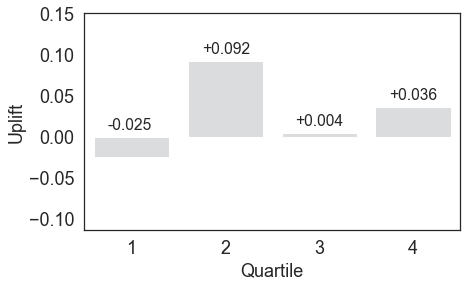

In [40]:
sns.set(font_scale=1.3) 
sns.set_style("white")
ax = sns.barplot(x = df_pred_bin.index, y = df_pred_bin["uplift"],color="#d9dcde")
plt.xlabel("Quartile",fontsize=18)
plt.ylabel("Uplift",fontsize=18)
plt.ylim(-0.114,0.151)
#ax.set_ylim(0.05, 1)
x_offset = -0.25
y_offset = 0.01
ax.tick_params(labelsize=18)
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.3f}".format(b.y1 + b.y0)
    if b.y1 < 0:
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1*-1 + y_offset*-1.6))
    elif b.y1 > 0:
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
#fig_uplift = ax.get_figure()
#fig_uplift.savefig('Fig2B.pdf',bbox_inches='tight',transparent =True)

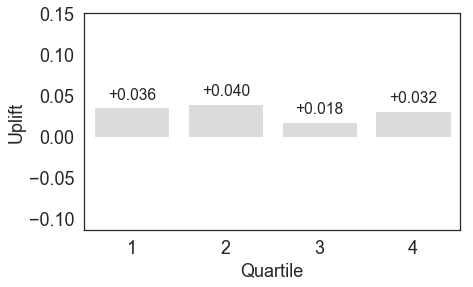

In [46]:
sns.set(font_scale=1.3) 
sns.set_style("white")
ax = sns.barplot(x = df_pred_bin.index, y = df_pred_bin["uplift"],color="#d9dcde")
plt.xlabel("Quartile",fontsize=18)
plt.ylabel("Uplift",fontsize=18)
plt.ylim((-0.114,0.151))
#ax.set_ylim(0.05, 1)
x_offset = -0.25
y_offset = 0.01
ax.tick_params(labelsize=18)
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.3f}".format(b.y1 + b.y0)
    if b.y1 < 0:
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1*-1 + y_offset*-1.6))
    elif b.y1 > 0:
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
#fig_uplift = ax.get_figure()
#fig_uplift.savefig('Fig2C.pdf',bbox_inches='tight',transparent =True)